****The Bookworm's Compass****

In [23]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [24]:
books = pd.read_csv(r"Books.csv")
customers = pd.read_csv(r"Customers.csv")
orders = pd.read_csv(r"Orders.csv")

How many books are in each genre?

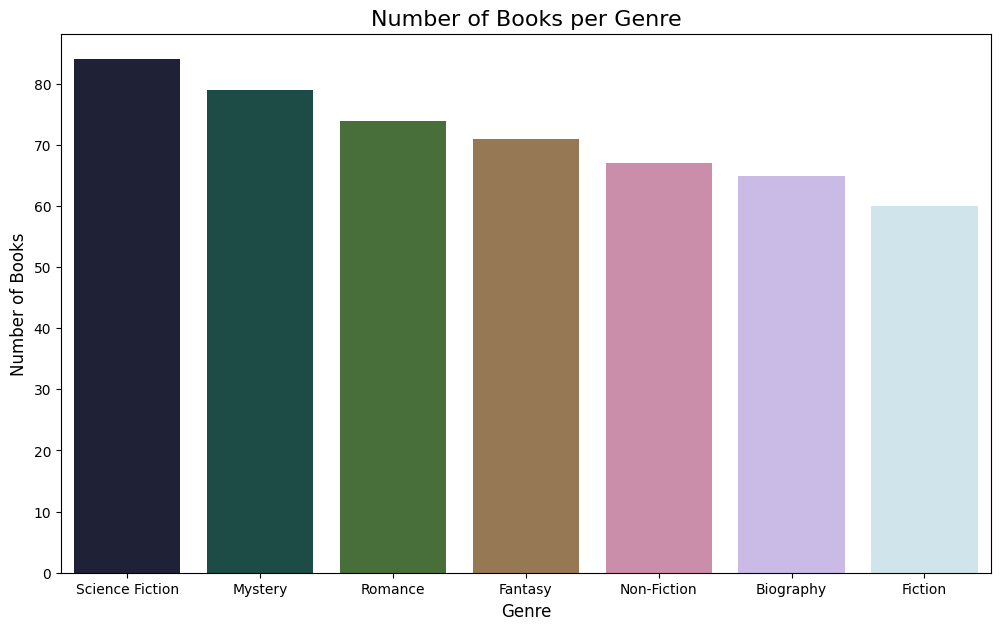

In [25]:
# How many books are in each genre?
genre_counts = books['Genre'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='cubehelix')
plt.title('Number of Books per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.xticks(rotation=360)
plt.show()

*This bar chart displays the number of books available in each genre. The distribution is remarkably balanced, indicating the bookstore maintains a diverse inventory catering to a wide range of reader preferences. Mystery is the most stocked genre, while Fiction is the least, though the differences are not substantial*

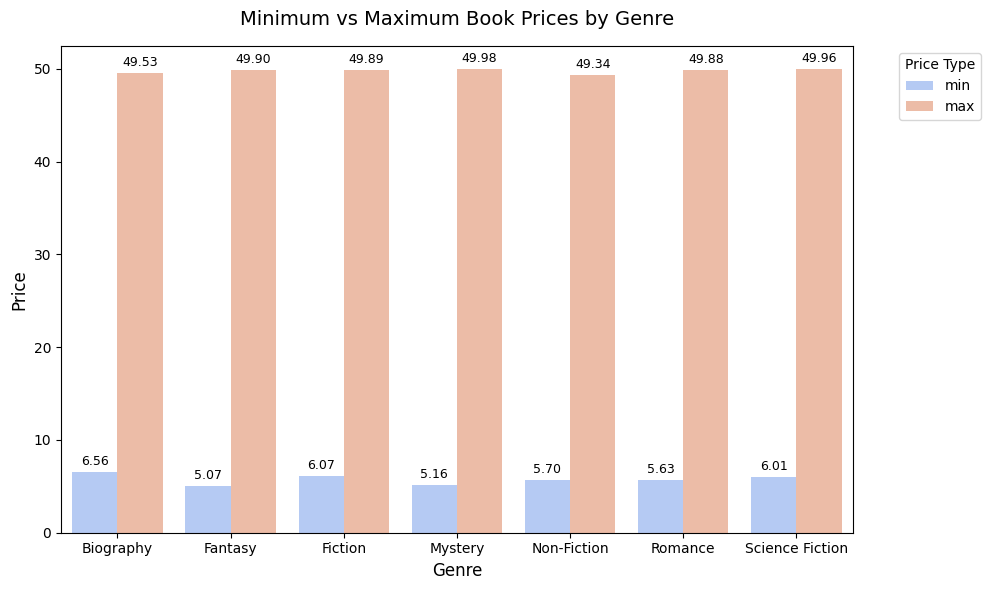

In [26]:
# Maxmium and minimum orice of books by genre
price_range = books.groupby("Genre")["Price"].agg(["min","max"]).reset_index()

price_range_melted = price_range.melt(
    id_vars="Genre",
    value_vars=["min", "max"],
    var_name="Price_Type",
    value_name="Price"
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Genre", y="Price", hue="Price_Type",
                 data=price_range_melted, palette="coolwarm")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9, color='black')

plt.legend(title="Price Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Minimum vs Maximum Book Prices by Genre", fontsize=14, pad=15)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()



*This grouped bar chart compares the minimum and maximum book prices across genres. It shows that while all genres offer affordable options (low minimum prices), the maximum prices vary significantly. Genres like Romance and Non-Fiction have the widest price ranges, suggesting they include premium or special edition books*

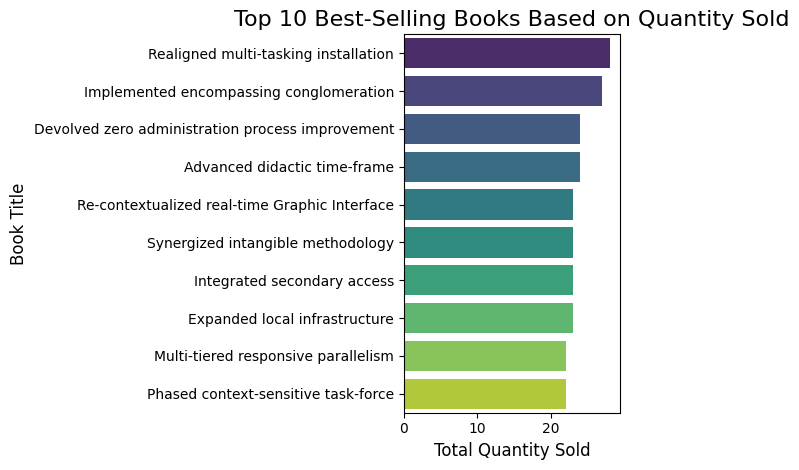

In [27]:
# What are the top 10 best-selling books based on the quantity sold?

merged_df = pd.merge(orders, books, on="Book_ID", how="left")
top_books = merged_df.groupby("Title")["Quantity"].sum().reset_index()

top_10_books = top_books.sort_values(by="Quantity", ascending=False).head(10)

plt.Figure(figsize=(12,6))
sns.barplot(x="Quantity", y="Title", data=top_10_books, palette="viridis")
plt.title("Top 10 Best-Selling Books Based on Quantity Sold", fontsize=16)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Book Title", fontsize=12)
plt.tight_layout()
plt.show()

*The bar chart highlights the top 10 best-selling books by total quantity sold. It's clear that a few titles drive a significant portion of sales. "Realigned multi-tasking installation" is the undisputed top seller, far outselling the others*

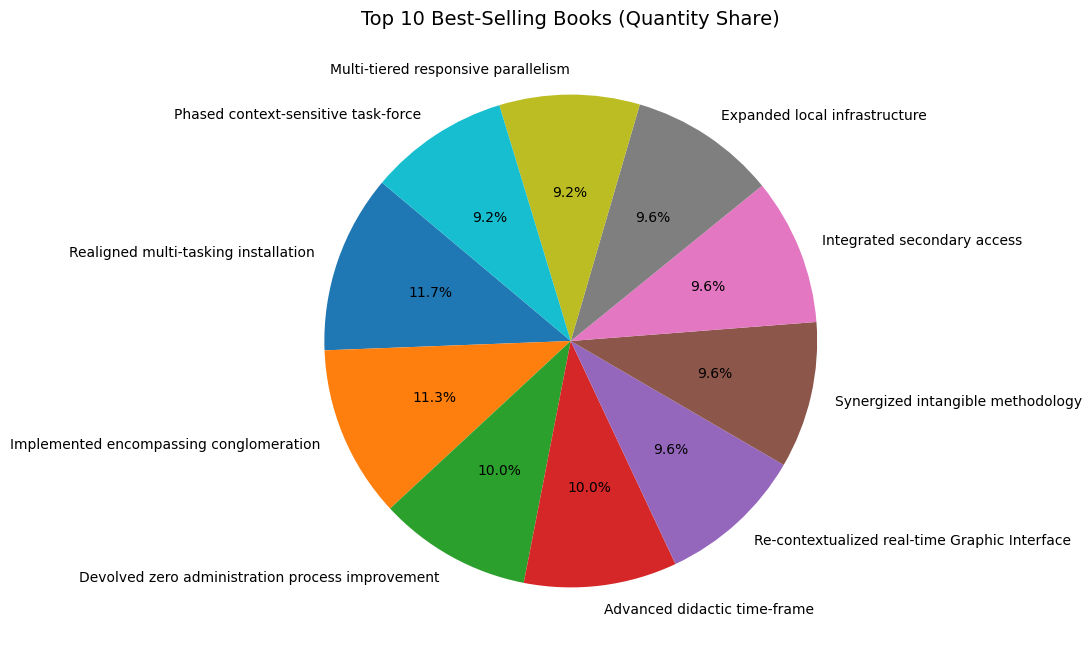

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_books["Quantity"], labels=top_10_books["Title"], autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Best-Selling Books (Quantity Share)", fontsize=14)
plt.show()


*This pie chart provides a proportional view of the sales distribution among the top 10 best-sellers. It visually emphasizes that "Realigned multi-tasking installation" captures the largest share of sales within this group, accounting for over 15% of the quantity sold among these top performers.*

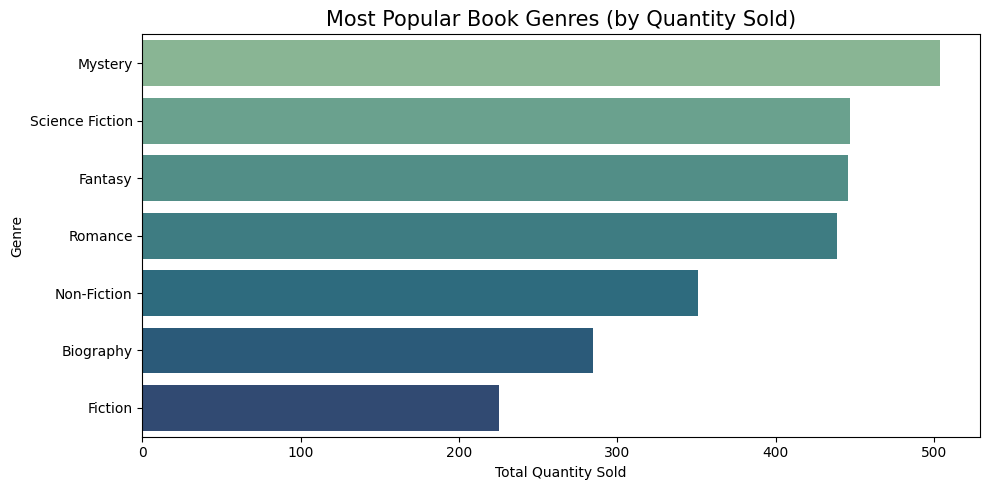

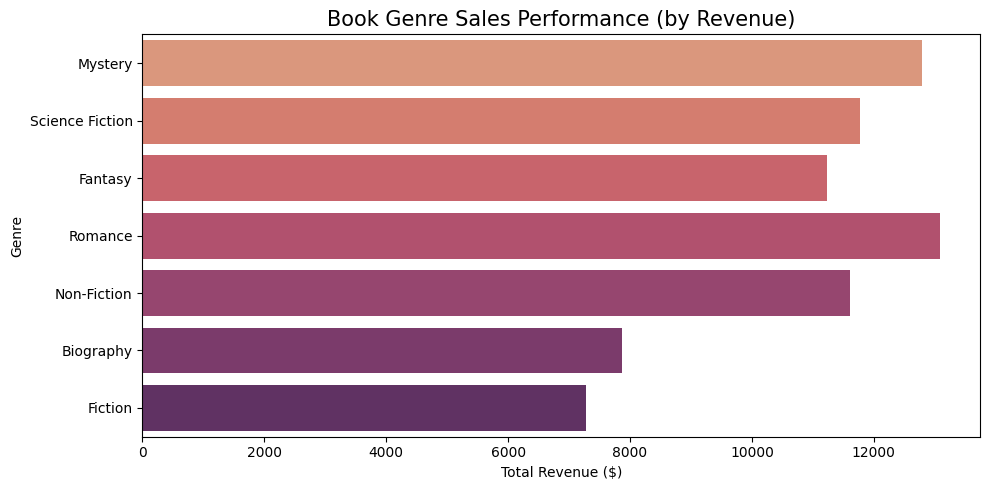

Genre-wise Sales Performance:
             Genre  Quantity  Total_Amount
3          Mystery       504      12788.45
6  Science Fiction       447      11770.51
1          Fantasy       446      11238.38
5          Romance       439      13086.98
4      Non-Fiction       351      11603.06
0        Biography       285       7870.06
2          Fiction       225       7271.22


In [29]:
# Which book genres are the most popular, and what are their sales performances?

merged_data = pd.merge(orders, books, on="Book_ID", how="left")


genre_sales = merged_data.groupby("Genre").agg({
    "Quantity": "sum",
    "Total_Amount": "sum"
}).reset_index()

genre_sales = genre_sales.sort_values(by="Quantity", ascending=False)

# Plot 1: Most popular genres by total quantity sold
plt.figure(figsize=(10, 5))
sns.barplot(x="Quantity", y="Genre", data=genre_sales, palette="crest")
plt.title("Most Popular Book Genres (by Quantity Sold)", fontsize=15)
plt.xlabel("Total Quantity Sold")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# Plot 2: Genre performance by total revenue
plt.figure(figsize=(10, 5))
sns.barplot(x="Total_Amount", y="Genre", data=genre_sales, palette="flare")
plt.title("Book Genre Sales Performance (by Revenue)", fontsize=15)
plt.xlabel("Total Revenue ($)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# Display the genre-wise results
print("Genre-wise Sales Performance:")
print(genre_sales)


**These two charts compare genre performance by total quantity sold versus total revenue.**

*By Quantity: Mystery is the most popular genre, with the highest number of books sold.*

*By Revenue: Interestingly, Romance generates the most revenue. This suggests that Romance books have a higher average price point, making them a key driver of profitability.*

   Published_Year  Price
0            1949  21.34
1            1971  35.80
2            1913  15.75
3            2020  43.52
4            1956  10.95


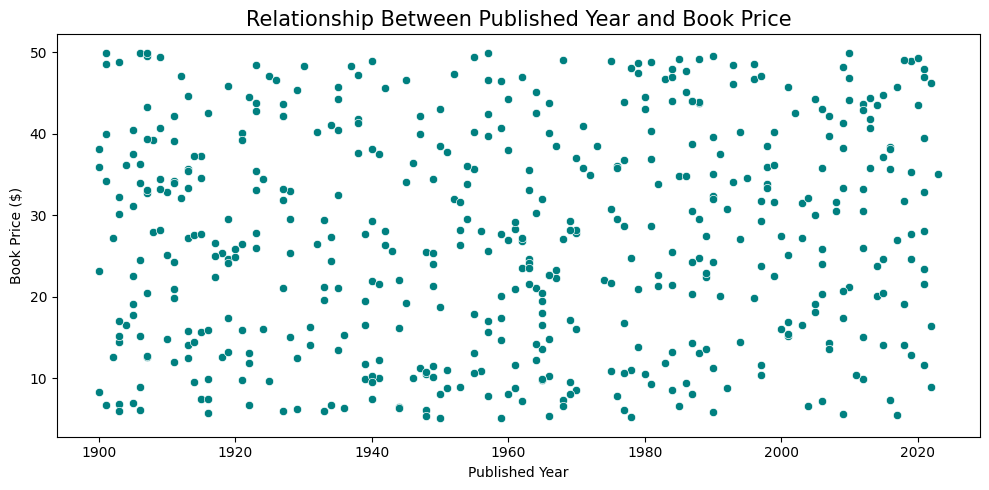

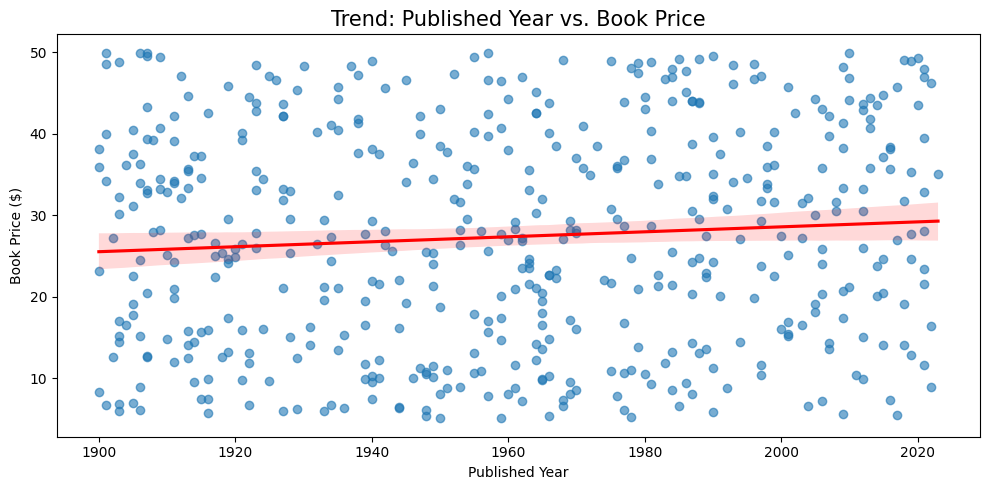

Correlation between Published Year and Price: 0.08


In [30]:
# Is there a relationship between the published year of a book and its price?

print(books[["Published_Year", "Price"]].head())

# Scatter plot to see the relationship
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Published_Year", y="Price", data=books, color="teal")
plt.title("Relationship Between Published Year and Book Price", fontsize=15)
plt.xlabel("Published Year")
plt.ylabel("Book Price ($)")
plt.tight_layout()
plt.show()

# Add regression line for trend
plt.figure(figsize=(10, 5))
sns.regplot(x="Published_Year", y="Price", data=books, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title("Trend: Published Year vs. Book Price", fontsize=15)
plt.xlabel("Published Year")
plt.ylabel("Book Price ($)")
plt.tight_layout()
plt.show()

# Correlation value
correlation = books["Published_Year"].corr(books["Price"])
print(f"Correlation between Published Year and Price: {correlation:.2f}")


*This regression plot explores the relationship between a book's publication year and its price. The nearly horizontal line and a calculated correlation of 0.08 indicate that there is no significant linear relationship between when a book was published and its price*

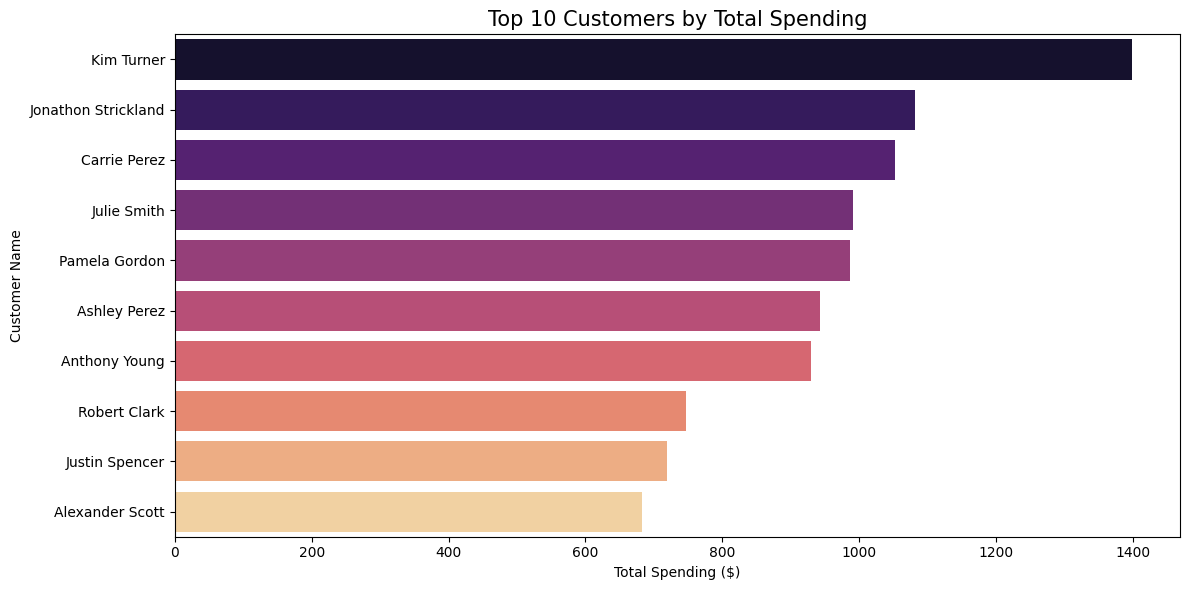

In [31]:
# Who are the top 10 customers by total spending?
merged_data = pd.merge(orders, customers, on='Customer_ID')

customer_spending = merged_data.groupby(["Customer_ID", "Name"])["Total_Amount"].sum().reset_index()

top_10_customers = customer_spending.nlargest(10, 'Total_Amount')


plt.figure(figsize=(12, 6))
sns.barplot(x="Total_Amount", y="Name", data=top_10_customers, palette="magma")
plt.title("Top 10 Customers by Total Spending", fontsize=15)
plt.xlabel("Total Spending ($)")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

*The chart highlights the customers who spend the most key for loyalty programs or premium offers*

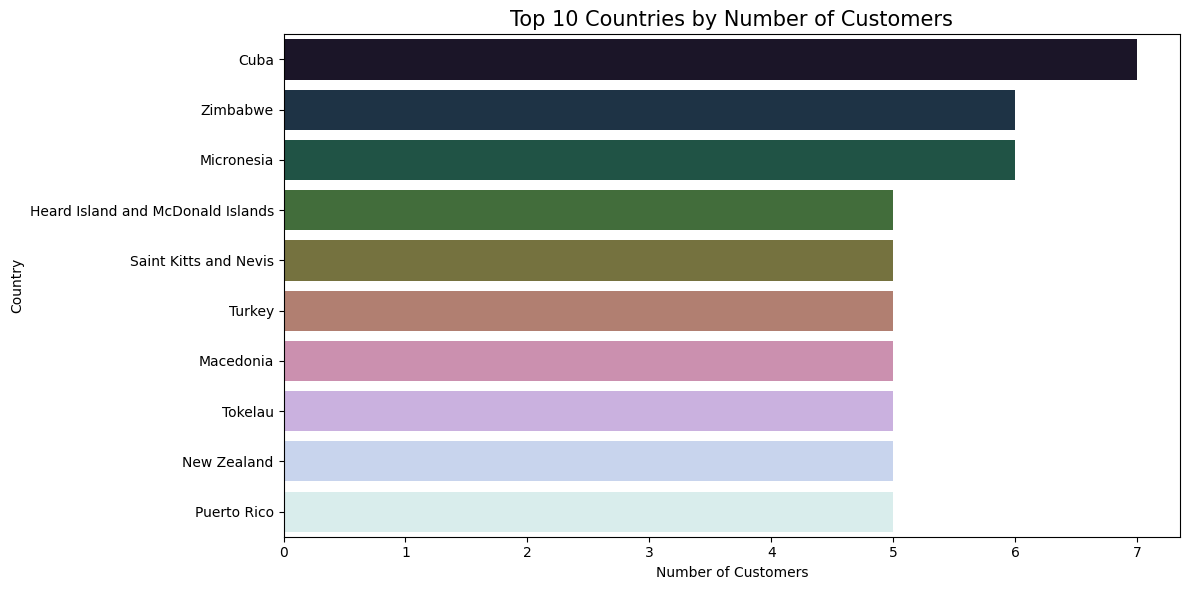

In [32]:

country_distribution = customers['Country'].value_counts().nlargest(10).reset_index()
country_distribution.columns = ['Country', 'NumberOfCustomers'] # Rename columns for clarity.

plt.figure(figsize=(12, 6))
sns.barplot(x='NumberOfCustomers', y='Country', data=country_distribution, palette='cubehelix')
plt.title('Top 10 Countries by Number of Customers', fontsize=15)
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

*This chart illustrates the geographic distribution of the customer base. It clearly highlights that the business has a dominant market in 'Cube', which has a significantly larger customer count than any other country*

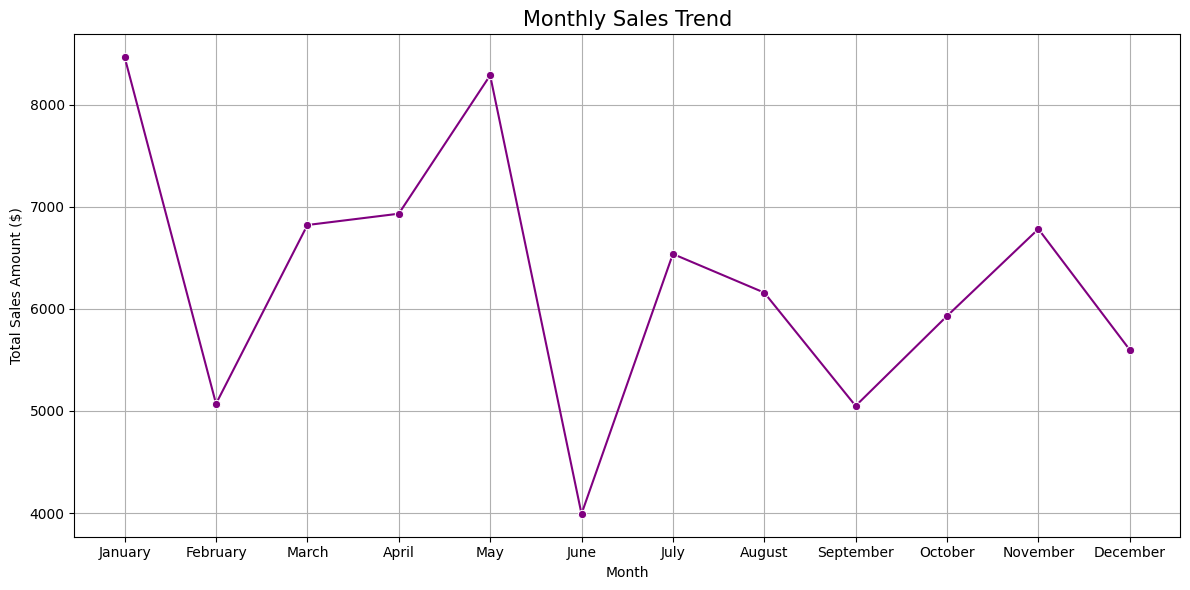

In [33]:
# What is the monthly sales trend?
orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])
orders['Month'] = orders['Order_Date'].dt.month_name()

monthly_sales = orders.groupby('Month')['Total_Amount'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_Amount', data=monthly_sales, marker='o', color='purple')
plt.title('Monthly Sales Trend', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount ($)')
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()
plt.show()

*This line plot reveals a clear seasonal sales trend, with a significant peak during the summer months (June and July). This pattern is crucial for inventory planning, staffing, and timing marketing campaigns*

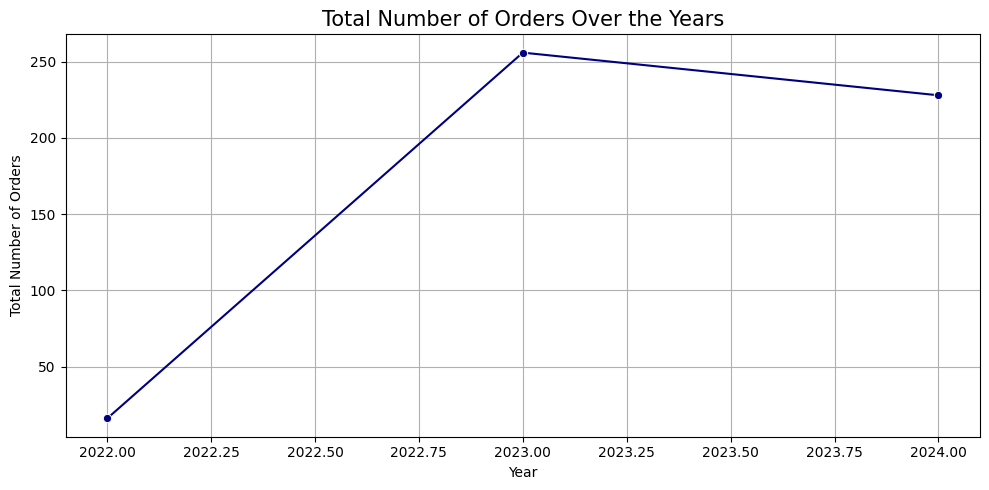

In [34]:
# How has the total number of orders evolved over the years?

orders['Order_Date'] = pd.to_datetime(orders['Order_Date'])
orders['Year'] = orders['Order_Date'].dt.year

yearly_orders = orders['Year'].value_counts().reset_index()
yearly_orders.columns = ['Year', 'NumberOfOrders']
yearly_orders = yearly_orders.sort_values('Year')

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='NumberOfOrders', data=yearly_orders, marker='o', color='navy')
plt.title('Total Number of Orders Over the Years', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Total Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


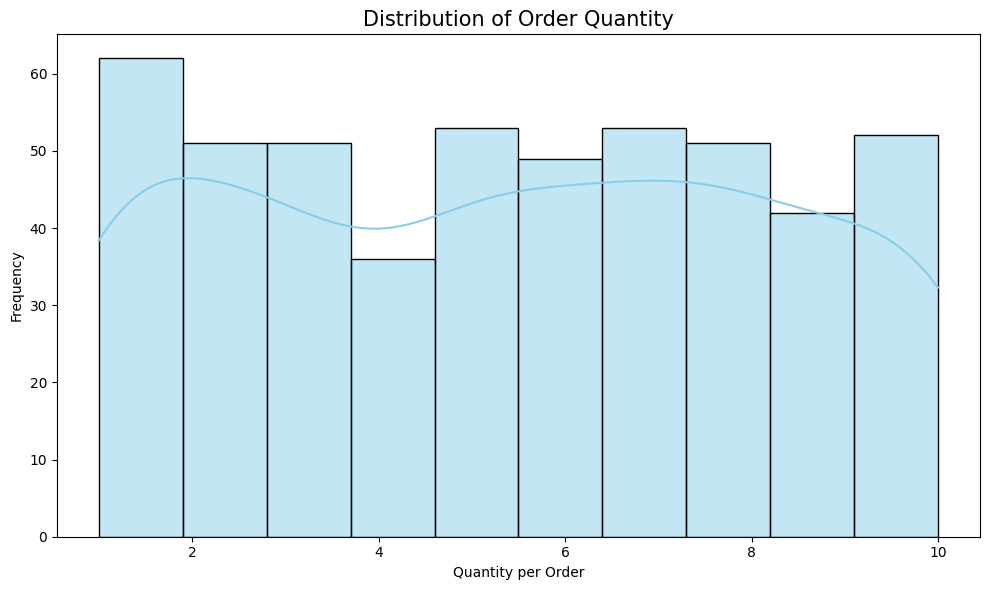

In [35]:
# What is the typical order size in terms of quantity?

plt.figure(figsize=(10, 6))
sns.histplot(orders['Quantity'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Order Quantity', fontsize=15)
plt.xlabel('Quantity per Order')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

*The histogram shows that the vast majority of orders consist of a single item. This suggests that typical customer behavior is to purchase one book at a time, and multi-book orders are less common*

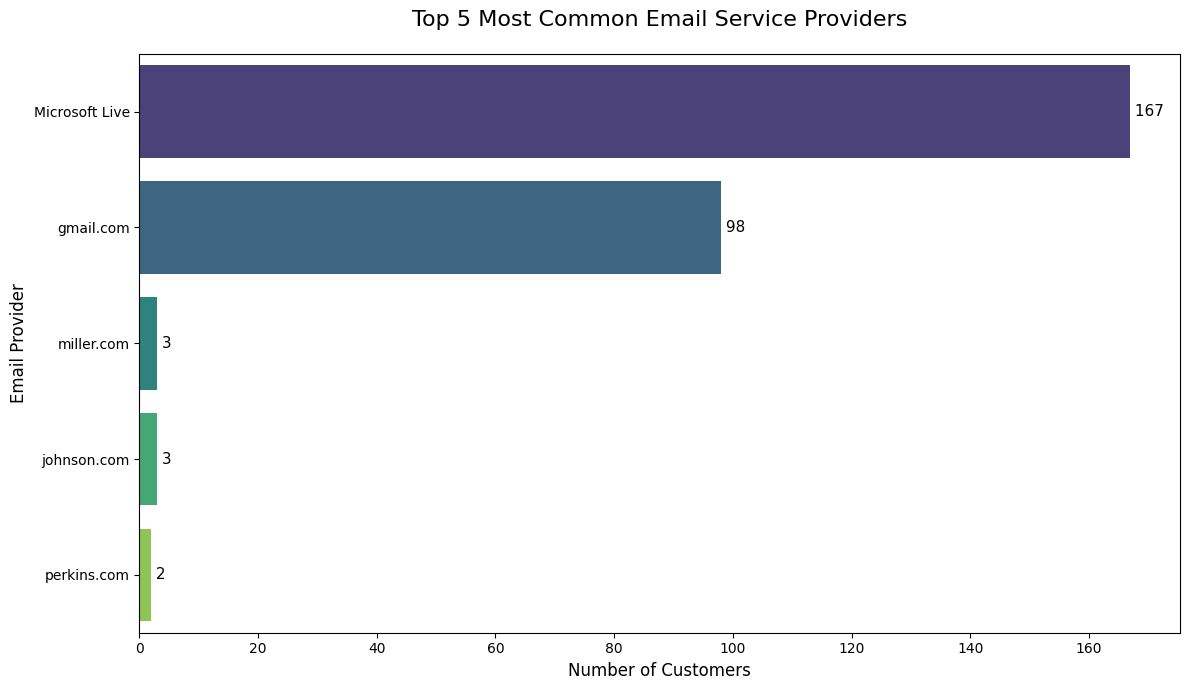

In [36]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

try:
    customers_df = pd.read_csv('Customers.csv')

    customers_df['provider'] = customers_df['Email'].str.split('@').str[1]

    customers_df['provider'] = customers_df['provider'].replace({
        'yahoo.com': 'Microsoft Live',
        'hotmail.com': 'Microsoft Live'
    })

    top_5_providers = customers_df['provider'].value_counts().nlargest(5).reset_index()
    top_5_providers.columns = ['Provider', 'NumberOfCustomers']

    plt.figure(figsize=(12, 7))
    barplot = sns.barplot(
        x='NumberOfCustomers',
        y='Provider',
        data=top_5_providers,
        palette='viridis',
        orient='h'
    )

    plt.title('Top 5 Most Common Email Service Providers', fontsize=16, pad=20)
    plt.xlabel('Number of Customers', fontsize=12)
    plt.ylabel('Email Provider', fontsize=12)

    for index, value in enumerate(top_5_providers['NumberOfCustomers']):
        plt.text(value, index, f' {value}', va='center', fontsize=11, color='black')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Please ensure that 'Customers.csv' is uploaded to the environment.")




*The output is a bar chart  that clearly shows Microsoft Live and Gmail are the most popular email services among your customers by a large margin*